# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [258]:
# data processing
import numpy as np
import pandas as pd
import datetime
import math
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

# Packages for modeling
import surprise
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time


# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random

%matplotlib inline

#sns.set(style='whitegrid', palette='muted',
        #rc={'figure.figsize': (15,10)})

#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [6]:
dftrain = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/train.csv')

In [7]:
dftest = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/test.csv')

In [8]:
dftags = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/tags.csv')

In [9]:
dfmovies = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/movies.csv')

In [10]:
dflinks = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/links.csv')

In [11]:
dfimdb_data = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/imdb_data.csv')

In [12]:
dfgenome_tags = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/genome_tags.csv')

In [13]:
dfgenome_scores = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/genome_scores.csv')

# Data structure

In [240]:
dftrain.head(0)

,userId,movieId,rating,timestamp


In [241]:
dftest.head(0)

,userId,movieId


In [242]:
dftags.head(0)

,userId,movieId,tag,timestamp


In [243]:
dfmovies.head(0)

,movieId,title,genres


In [244]:
dflinks.head(0)

,movieId,imdbId,tmdbId


In [245]:
dfimdb_data.head(0)

,movieId,title_cast,director,runtime,budget,plot_keywords


In [246]:
dfgenome_tags.head(0)

,tagId,tag


In [247]:
dfgenome_scores.head(0)

,movieId,tagId,relevance


## Merging datasets

All datasets to be merged will be done in this section. 
This is to see if some features should be used and which not to use.

In [225]:
dfgenome = dfgenome_scores.merge(dfgenome_tags, how = 'left', on = 'tagId')

In [226]:
dfgenome.head(0)

,movieId,tagId,relevance,tag


In [227]:
dftags.head(1)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355


In [228]:
dftags.groupby(['movieId'])

In [230]:
dftags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [175]:
#dfmoviemerge = dfmovies.merge(dftags, how = 'left', on = 'movieId')

In [178]:
#dfmovies.shape

(62423, 3)

In [150]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    .. warning::
    
        If both key columns con

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [151]:
# look at data statistics

In [152]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
trainavgrating = pd.DataFrame(dftrain.groupby('userId')['rating'].agg('mean').reset_index())
train2 = pd.DataFrame(dftrain.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
trainavgrating = trainavgrating.merge(train2,on='userId',how = 'left')
# Rename the columns respectively
trainavgrating.rename(columns={'rating_x':'avg_rating','rating_y':'number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
trainavgrating = trainavgrating.sort_values('number_of_movies', ascending = False)

In [153]:
# Show 5 observations 
trainavgrating.head()

,userId,avg_rating,number_of_movies
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


In [154]:
trainavgrating['number_of_movies'].mean()

61.52317261490947

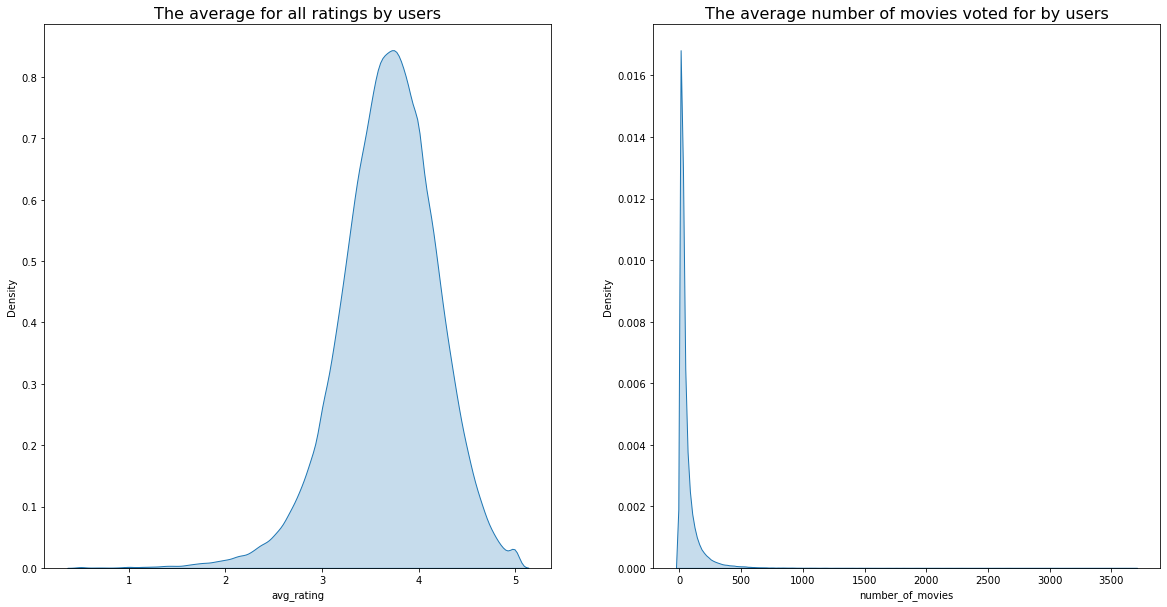

In [155]:
#Doing density plots to show rating distributions and what the average amount of movies get voted per user

fig, ax = plt.subplots(1,2,figsize=(20, 10)) 

# The average for all ratings by users
sns.kdeplot(ax=ax[0], x='avg_rating', data=trainavgrating, shade = 'fill') 
ax[0].set_title("The average for all ratings by users",fontsize = 16)

# The average number of movies voted for by users
sns.kdeplot(ax=ax[1], x='number_of_movies', data=trainavgrating[1:], shade = 'fill') 
ax[1].set_title("The average number of movies voted for by users",fontsize = 16)
    
plt.show()

In [156]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, warn_singular=True, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analagous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can

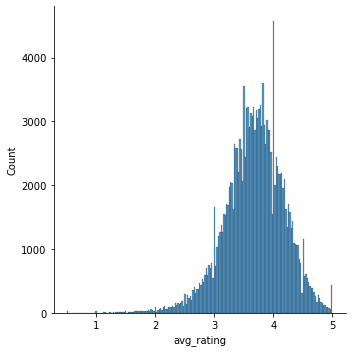

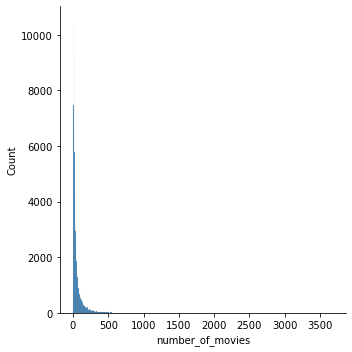

In [157]:
# The average for all ratings by users
sns.displot(x='avg_rating', data=trainavgrating) 
ax[0].set_title("The average for all ratings by users",fontsize = 16)

# The average number of movies voted for by users
sns.displot(x='number_of_movies', data=trainavgrating[1:]) 
ax[1].set_title("The average number of movies voted for by users",fontsize = 16)
    
plt.show()

In [158]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


In [159]:
# plot relevant feature interactions

In [160]:
# evaluate correlation

In [161]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [162]:
# remove missing values/ features

In [163]:
# create new features

In [164]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Collaborative and Content based filtering

In [ ]:
# split data

In [165]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [167]:
dfmovies['genres'] = dfmovies.genres.str.split('|')

In [168]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [169]:
moviesWithGenres_df = dfmovies.copy()

In [170]:
moviesWithGenres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [173]:
for index, row in dfmovies.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
moviesWithGenres_df = moviesWithGenres_df.fillna(0)

In [174]:
moviesWithGenres_df.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),[Comedy],0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def data_preprocessing(subset_size):

    movies = dfmovies.copy()
    # Split the genres feature so that each genres will be in a list format 
    movies['genres'] = movies.genres.str.split('|')

    #Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
    dfmoviesG = movies.copy()

    #For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
    for index, row in movies.iterrows():
        for genre in row['genres']:
            dfmoviesG.at[index, genre] = 1
    #Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
    dfmoviesG = dfmoviesG.fillna(0)
    dfmoviesG.drop(['genres'],axis =1, inplace = True)
    # Slice the data
    submoviedata = dfmoviesG[:subset_size]

    return submoviedata

In [15]:
def content_model(movie_list,top_n=10):

    # Initializing the empty list of recommended movies
    moviesRec = []
    # Preprocess the data 
    data = data_preprocessing(27000)

    # Create a new DataFrame
    data2 = data.copy()

    # Change the index of the DataFrame
    data2 = data2.set_index('title')

    # Delete the columns the unneccesary columns 
    data.drop(['title'],axis = 1,inplace=True)
    
    # Generating the count matrix for each genres
    data = data.set_index('movieId')

    # Instantiating the model and fitting the model to the count matrix
    nn = NearestNeighbors(algorithm='brute',metric='cosine',n_neighbors=10)
    nn.fit(data)

    # Create an Empty list for the movieids
    movieids = []

    # Getting the movieids
    ind1 = data2.loc[movie_list[0],'movieId']
    ind2 = data2.loc[movie_list[1],'movieId']
    ind3 = data2.loc[movie_list[2],'movieId']

    # Adding the movieids to the list
    movieids.extend([ind1,ind2,ind3])
    # Setting a list of indexes
    index_list = []

    # Getting the suggestions in form of indexes
    for i in range(len(movieids)):
        distances,suggestions=nn.kneighbors(data.loc[movieids[i],:].values.reshape(1,-1),n_neighbors=15)

        for j in range(15):
            index_list.append(suggestions[0,j])

    # Creating an empty list to store the movie ids 
    movieids2 = []
    
    # Create a for loop get the titles of the movies
    for i in range(len(index_list)):
        id = data.index.values[index_list[i]]
        movieids2.append(id)

    # Create a list to store all the titles
    title_list = []

    # Create a new dataframe to get the titles of the movies and change the index to movieId 
    data3 = data_preprocessing(27000)
    data3 = data3.set_index('movieId')

    for i in range(len(movieids2)):
        title = data3.loc[movieids2[i],'title']
        if(title not in movie_list):
            title_list.append(title)

    # recommended movies 
    moviesRec.extend(random.sample(title_list,k = top_n))
    return moviesRec

## PCA to lower dimensions

In [16]:
# Scaling the movies_df
# declare the features to be all columns from our movies_df
features = [col for col in dftrain.columns]

# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
dfscaled = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/train.csv')
dfscaled[features] = preprocessing.scale(dfscaled[features])

Text(0, 0.5, 'Cumulative explained variance')

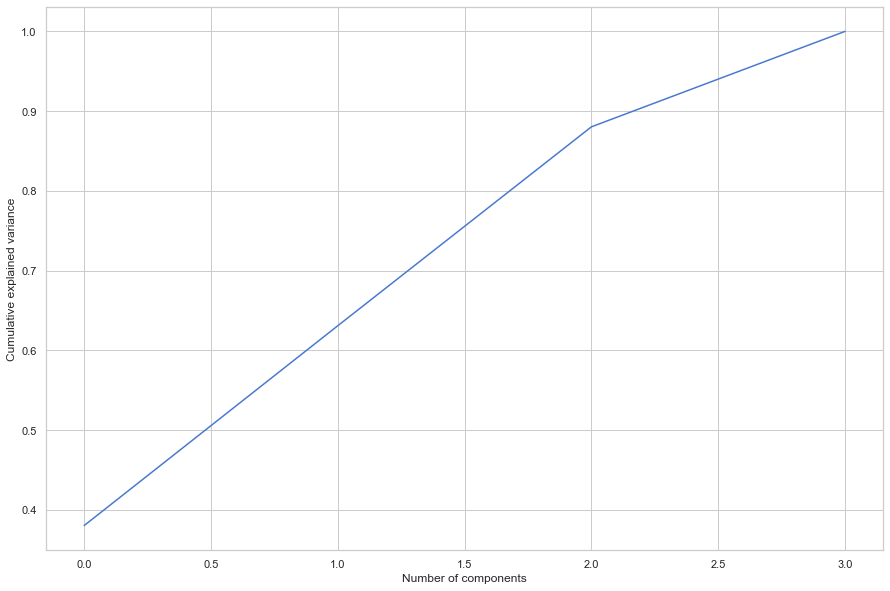

In [17]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
principalcomponants = pca.fit_transform(dfscaled[features])

# create a dataframe containing the principal components
dfpca = pd.DataFrame(data = principalcomponants)



# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [18]:
pca_85 = PCA(.85)
pca_85.fit_transform(dfscaled[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

88.0 % of variance explained by 3 components.


In [19]:
# exclude non-features from data
reg_data = dfscaled[features]

# set aside response variable (Unscaled!)
reg_response = dftrain["rating"]

# drop response variable
reg_data = reg_data.drop(['rating'], 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(reg_data, reg_response, test_size=0.2)

In [21]:
# create PCA object with n_components set to 2
pca_reg = PCA(n_components=2)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

2

In [22]:
pca_reg.explained_variance_ratio_.sum()

0.8402498268356843

## Collaborative filtering

In [23]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

#our training data
df = pd.DataFrame(dftrain)
del df['timestamp']


# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [24]:
#packages we need
from surprise import accuracy
from surprise.model_selection import train_test_split

#allows us to train on the whole dataset
trainset = data.build_full_trainset()

#SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [25]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the SVD algorithm.
algo2 = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8383


0.8382874720025622

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

# submission preparation

In [26]:
dftest.head(2)

,userId,movieId
0,1,2011
1,1,4144


In [27]:
dftest.loc[:, 'rating'] = 0
dftest.head()

,userId,movieId,rating
0,1,2011,0
1,1,4144,0
2,1,5767,0
3,1,6711,0
4,1,7318,0


In [28]:
#using load_from_df surprise function to load dataset for predictions
test_processed = Dataset.load_from_df(dftest[['userId','movieId','rating']], reader)

#Train test split, test size will be equal to 1.
NA, test = train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)

#Prediction 
predictions = algo.test(test)

In [29]:
#saving the predictions as a list to add as a column for our Kaggle submission
ratings = [i.est for i in predictions]
ratings

[3.309159370357028,
 4.336677691299777,
 3.5845457633569913,
 3.9599465041060933,
 3.024147030750502,
 3.9412156782459213,
 4.056151636628094,
 3.4930335137501043,
 3.6148757892483983,
 3.471970201908421,
 3.1758835785659674,
 3.175655493827266,
 4.198153670830882,
 4.817746949399077,
 4.279582930413788,
 4.054672465954786,
 3.466543858820533,
 2.9750604619352163,
 3.808969063463303,
 3.8062381323681107,
 4.215135638037467,
 3.3615533179434594,
 3.3382528899279,
 3.137284571993476,
 3.7014838830237666,
 3.5064613895645573,
 3.7389823423459605,
 2.753367416924152,
 3.0628866269315713,
 3.291322805155815,
 3.694772143918136,
 2.925918980562068,
 3.2040163408186437,
 3.426103274494401,
 3.3630721491715088,
 3.369937272284077,
 3.3153416650598535,
 3.643771678822039,
 5,
 3.2720457914341448,
 3.7733449851581864,
 3.372640633665745,
 4.871301623269124,
 3.496670955746237,
 4.351364772299307,
 3.598802516588121,
 4.0158767379922615,
 4.557546211658262,
 3.7691214455156583,
 4.257975066448051

In [30]:
dftest['Id'] = dftest['userId'].astype(str)  + '_'+ dftest['movieId'].astype(str) 

In [31]:
#change rating column
dftest['rating'] = ratings
del dftest['userId']
del dftest['movieId']

In [32]:
dftest['R'] = dftest['rating']
del dftest['rating']

In [33]:
dftest['rating'] = dftest['R']

In [34]:
del dftest['R']

In [35]:
dftest

,Id,rating
0,1_2011,3.309159
1,1_4144,4.336678
2,1_5767,3.584546
3,1_6711,3.959947
4,1_7318,3.024147
...,...,...
5000014,162541_4079,3.573837
5000015,162541_4467,4.246352
5000016,162541_4980,2.909725
5000017,162541_5689,2.803530


In [36]:
dftest.to_csv('FirstPCAsub.csv', index = False)